<a href="https://colab.research.google.com/github/rerkki/Ecitec/blob/test-branch/AI_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install paho-mqtt

In [0]:
import paho.mqtt.client as paho
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = []
Y = []
Pred = [[0]]


In [110]:
def on_connect(client, userdata, flags, rc):
    print('CONNACK received with code %d.' % (rc))

client = paho.Client()
client.on_connect = on_connect
client.connect('broker.mqttdashboard.com', 1883)

def column(matrix, i):
    return [row[i] for row in matrix]

def on_subscribe(client, userdata, mid, granted_qos):
    print("Subscribed: "+str(mid)+" "+str(granted_qos))

def on_message(client, userdata, msg):
    global X
    global Y
    global Pred
    global t
    obj = json.loads(msg.payload)
    t = float(obj['T'])
    h = float(obj['H'])
    dp = float(obj['DP'])
    newPred = [0]
    print(t,h,dp)
    newX = [t,h]
    newY = [dp]
    X.append(newX)
    Y.append(newY)
    if len(Y) <= 3: 
      print(X,Y,Pred)

    if len(Y) > 3:
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
      LR=LinearRegression()
      LR.fit(X_train,Y_train)
      PRED = LR.predict(X_test)
      test_set_rmse = (np.sqrt(mean_squared_error(Y_test, PRED)))
      test_set_r2 = r2_score(Y_test, PRED)
      dp_pred = LR.predict([[t, h]])[0][0]
      newPred = [dp_pred]
      print(test_set_rmse, test_set_r2, dp_pred)

    Pred.append(newPred)
    
client.on_subscribe = on_subscribe
client.on_message = on_message
client.connect('broker.mqttdashboard.com', 1883)
client.subscribe('Opiframe/softsensor', qos=1)  
client.loop_forever()

CONNACK received with code 0.
Subscribed: 1 (1,)
19.0 39.0 6.7
0.30974041731240176 0.9747694605872819 7.123374139250192
21.0 27.0 6.6
0.22498964750063025 0.9866876156522136 6.329049429657797
20.0 31.0 6.1
0.2622404429569353 0.9340159435714023 6.087209302325583
20.0 28.0 5.1
0.4143172654922897 0.7483828716017792 5.305421800436761
19.0 41.0 7.6
0.3969735641122472 0.7690078020462827 7.409881566960223
18.0 28.0 3.5
0.31231714969162455 0.9134242585874255 3.1663407315432757
24.0 26.0 9.4
0.32314684908709485 0.9073160774482979 9.325623567365657
22.0 41.0 10.3
0.3305979535965453 0.9100452617924086 10.529505220154338
18.0 41.0 6.6
0.2760536746354881 0.9840969075195501 6.396072925650337
23.0 33.0 10.0
0.35115932424716534 0.9835253345349732 9.877626045456694
19.0 39.0 6.9
0.3761693639804667 0.9045105758599957 6.929781941751713
22.0 36.0 9.0
0.3613554925659761 0.9118833963677103 9.406283547657662


KeyboardInterrupt: ignored

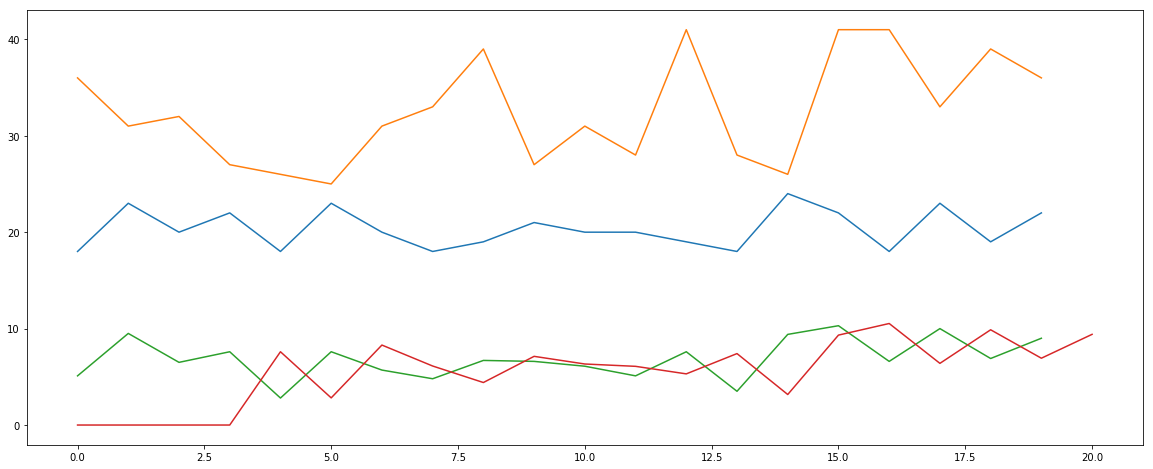

In [111]:
global X
plt.figure(figsize=(20,8))
plt.plot(X)
plt.plot(Y)
plt.plot(Pred)